In [1]:
import sys
import numpy as np
import yt


In [2]:
def metfrac(field,data):
    return data['Metal_Density']/data['density'] 
def znew(field,data):
    return data['z'] - ds.quan(0.53,'code_length')

In [3]:
#ds = yt.load("galaxy0030/galaxy0030")
ds = yt.load("DD0044/DD0044")

yt : [INFO     ] 2020-03-17 15:12:21,908 Parameters: current_time              = 0.044000089990001
yt : [INFO     ] 2020-03-17 15:12:21,909 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2020-03-17 15:12:21,911 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2020-03-17 15:12:21,915 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2020-03-17 15:12:21,917 Parameters: cosmological_simulation   = 0.0


In [4]:
for field in ds.fields.gas:
    print(field)

Parsing Hierarchy : 100%|██████████| 886/886 [00:00<00:00, 24506.42it/s]
yt : [INFO     ] 2020-03-17 15:12:22,017 Gathering a field list (this may take a moment.)


Alias Field for "('enzo', 'Cooling_Time')" (gas, cooling_time): (units: s)
Alias Field for "('enzo', 'Dark_Matter_Density')" (gas, dark_matter_density): (units: g/cm**3)
Alias Field for "('enzo', 'Density')" (gas, density): (units: g/cm**3)
Alias Field for "('enzo', 'Metal_Density')" (gas, metal_density): (units: g/cm**3)
Alias Field for "('enzo', 'Temperature')" (gas, temperature): (units: K)
Alias Field for "('enzo', 'x-velocity')" (gas, velocity_x): (units: cm/s)
Alias Field for "('enzo', 'y-velocity')" (gas, velocity_y): (units: cm/s)
Alias Field for "('enzo', 'z-velocity')" (gas, velocity_z): (units: cm/s)
Derived Field (gas, El_density): (units: g/cm**3)
Alias Field for "('enzo', 'HeII_Density')" (gas, He_p1_density): (units: g/cm**3)
Alias Field for "('enzo', 'HeI_Density')" (gas, He_density): (units: g/cm**3)
Alias Field for "('enzo', 'HII_Density')" (gas, H_p1_density): (units: g/cm**3)
Alias Field for "('enzo', 'HeIII_Density')" (gas, He_p2_density): (units: g/cm**3)
Alias Fi

In [5]:
ds.add_field(('gas','metf'),function=metfrac)
ds.add_field(('gas','zdisk'),function=znew,units='code_length')

/Users/stonnesen/Desktop/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  """Entry point for launching an IPython kernel.
/Users/stonnesen/Desktop/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  


yt : [INFO     ] 2020-03-17 15:12:30,450 Projection completed
yt : [INFO     ] 2020-03-17 15:12:30,461 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-17 15:12:30,462 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-17 15:12:30,463 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-17 15:12:30,465 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-17 15:12:30,473 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



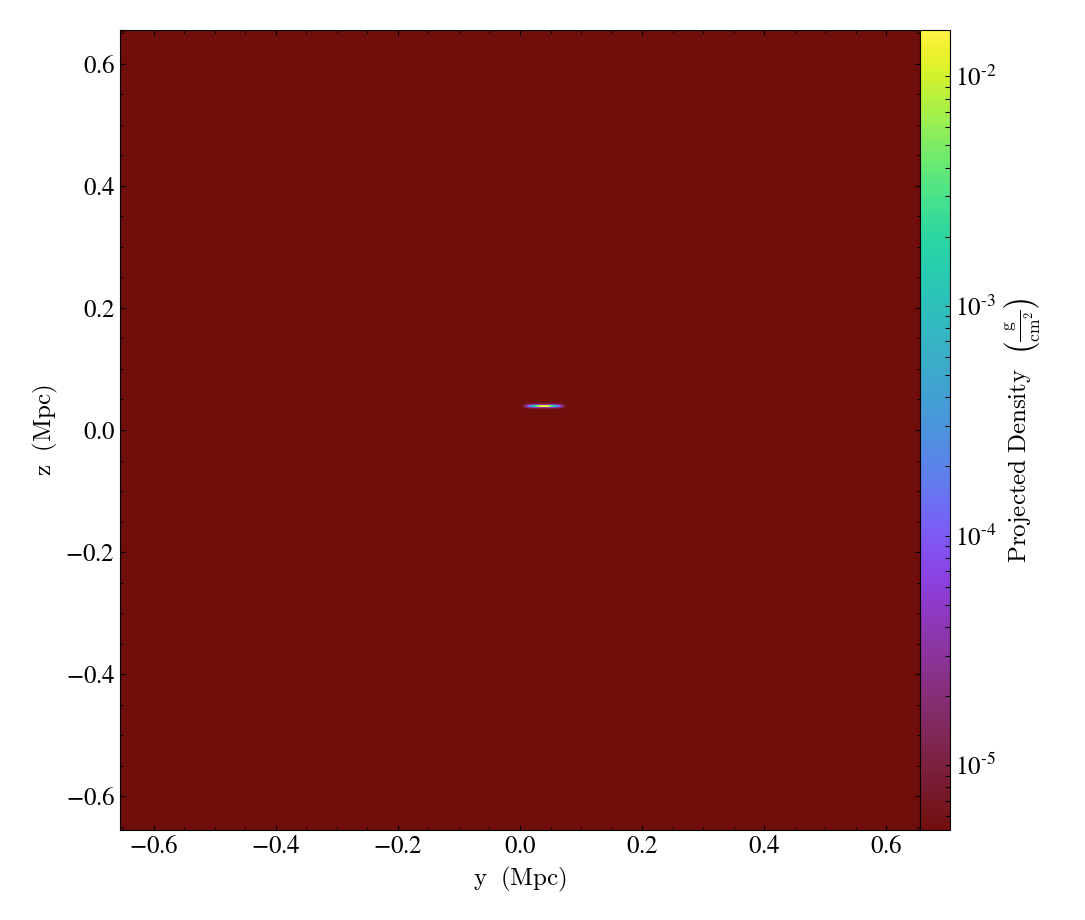

In [6]:
#Let's just take a look:
yt.ProjectionPlot(ds,"x","density")

In [7]:
#So things that I think about have to do with what kind of gas is stripped and from where in the disk
#If we are going to focus on the disk let's select that region:
disku = ds.disk([0.53,0.53,0.53],[0,0,1.0],(50,"kpc"),(5,"kpc"))
#regu = ds.box([0.4,0.4,0.24],[0.6,0.6,0.26])

yt : [INFO     ] 2020-03-17 15:12:32,295 xlim = 0.491853 0.568147
yt : [INFO     ] 2020-03-17 15:12:32,297 ylim = 0.491853 0.568147
yt : [INFO     ] 2020-03-17 15:12:32,299 xlim = 0.491853 0.568147
yt : [INFO     ] 2020-03-17 15:12:32,301 ylim = 0.491853 0.568147
yt : [INFO     ] 2020-03-17 15:12:32,302 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



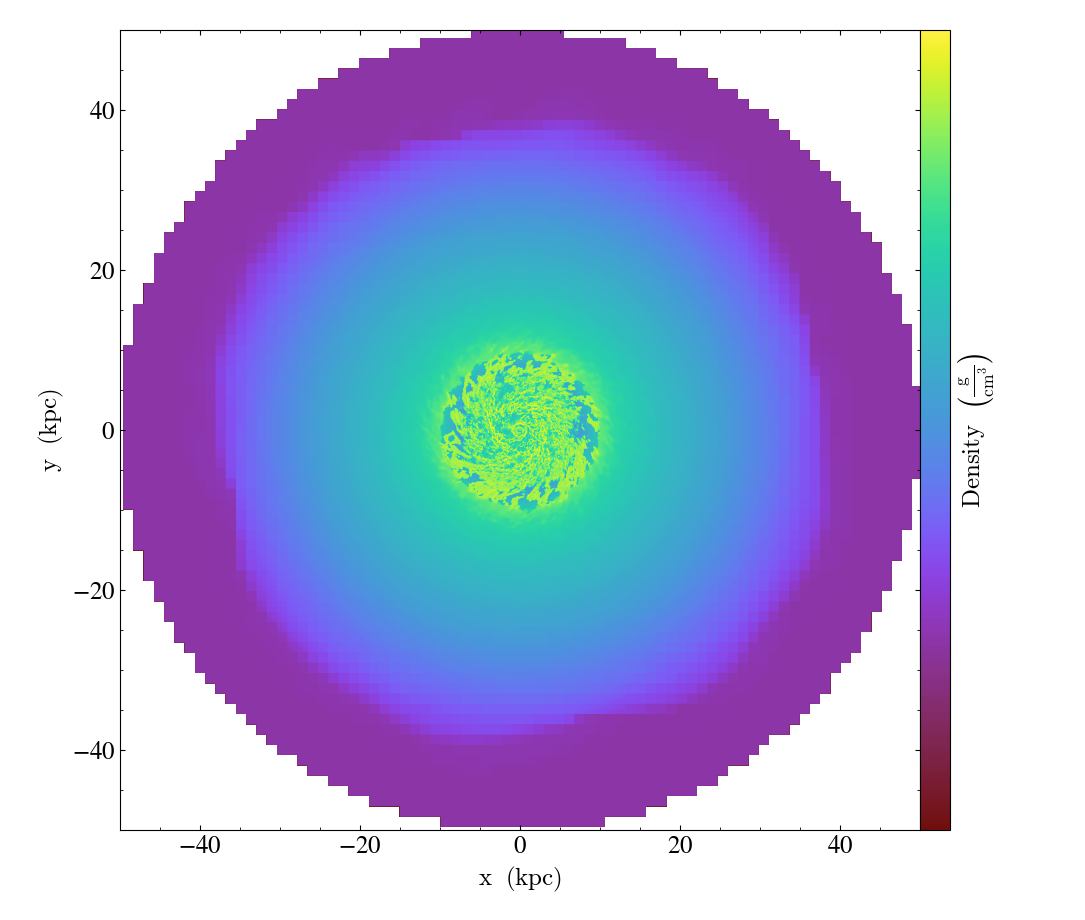

In [8]:
yt.SlicePlot(ds,"z","density",data_source=disku,center=(0.53,0.53,0.53),width=(100,'kpc'))

yt : [INFO     ] 2020-03-17 15:12:35,530 Projection completed
yt : [INFO     ] 2020-03-17 15:12:35,532 xlim = 0.495668 0.564332
yt : [INFO     ] 2020-03-17 15:12:35,534 ylim = 0.495668 0.564332
yt : [INFO     ] 2020-03-17 15:12:35,536 xlim = 0.495668 0.564332
yt : [INFO     ] 2020-03-17 15:12:35,538 ylim = 0.495668 0.564332
yt : [INFO     ] 2020-03-17 15:12:35,540 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



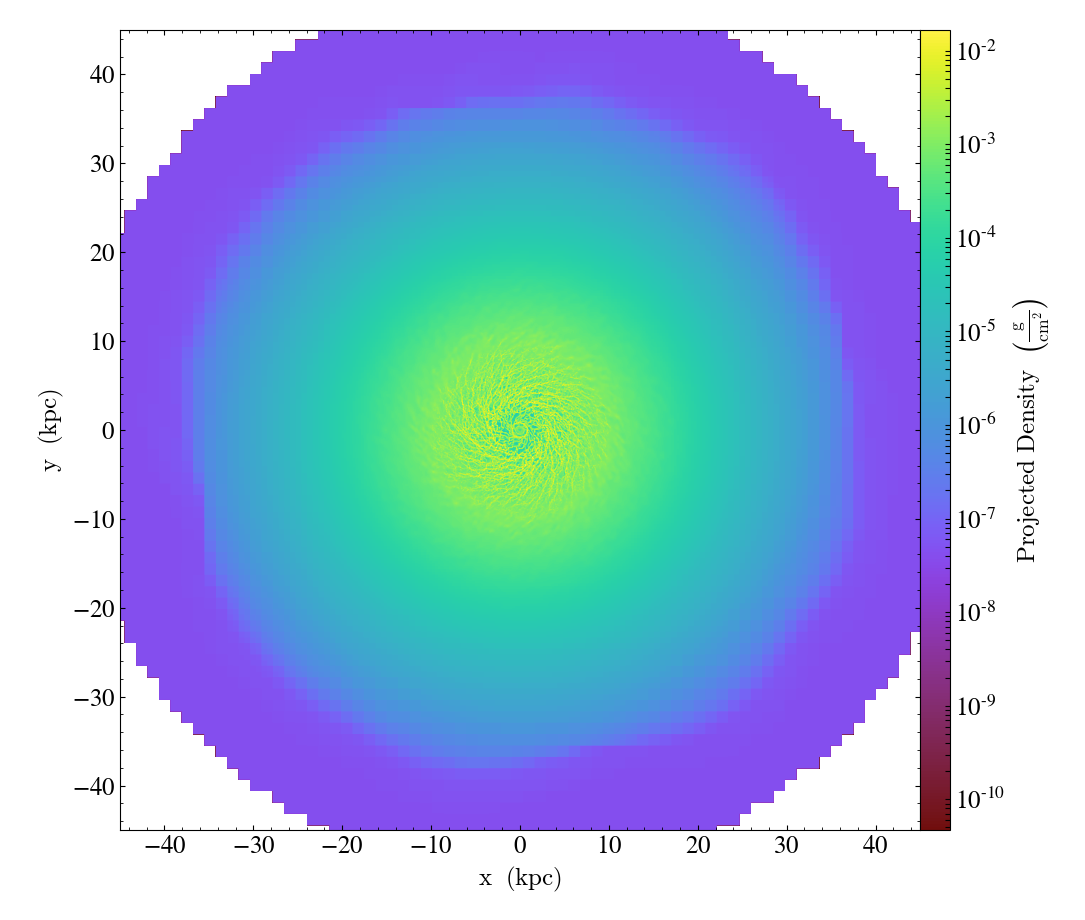

In [9]:
yt.ProjectionPlot(ds,"z","density",data_source=disku,center=[0.53,0.53,0.53],width=(90,"kpc"))


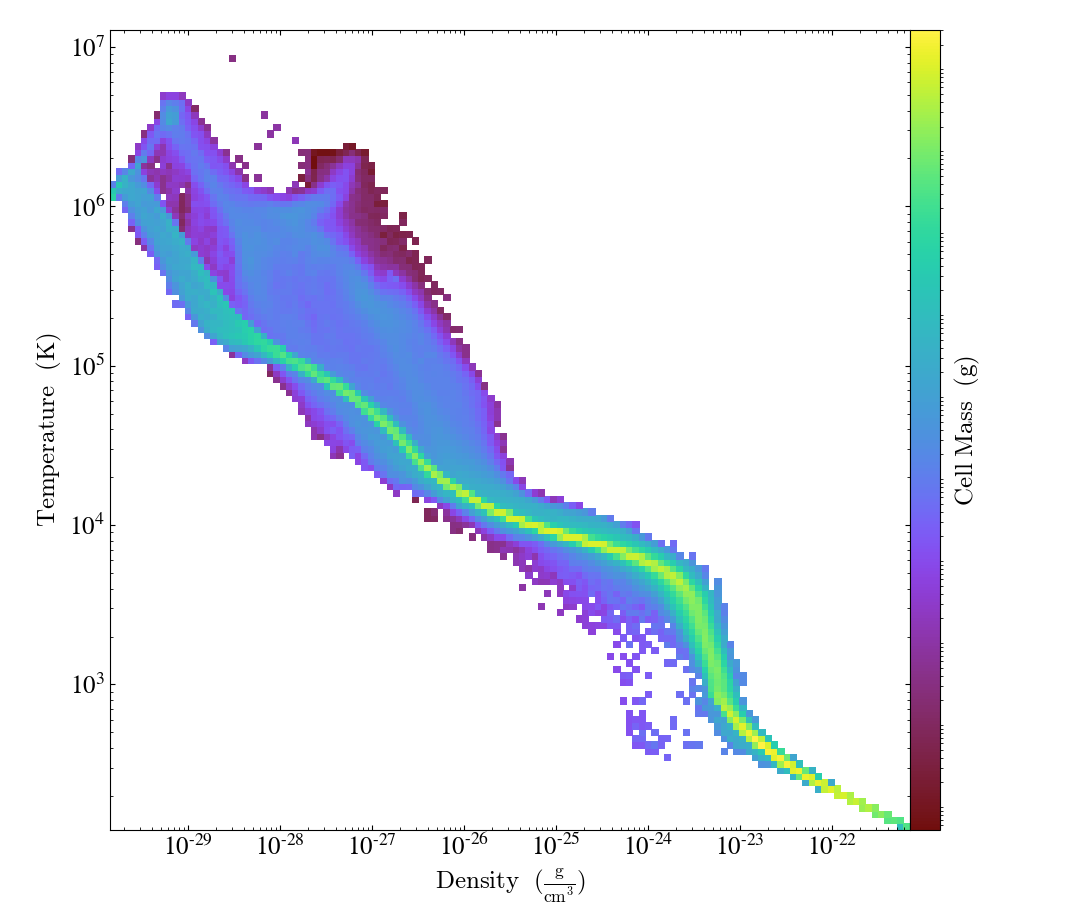

In [10]:
#Okay, so what kind of gas is in this disk?  Let's take a look at the rho-T distribution:
yt.PhasePlot(disku,"density","temperature",["cell_mass"],weight_field=None)
#yt.PhasePlot(ds,"density","temperature",["cell_mass"],weight_field=None)
#note, unlike with ProjectionPlot, I can't use "ds".  Need to use a selected region.  Why?


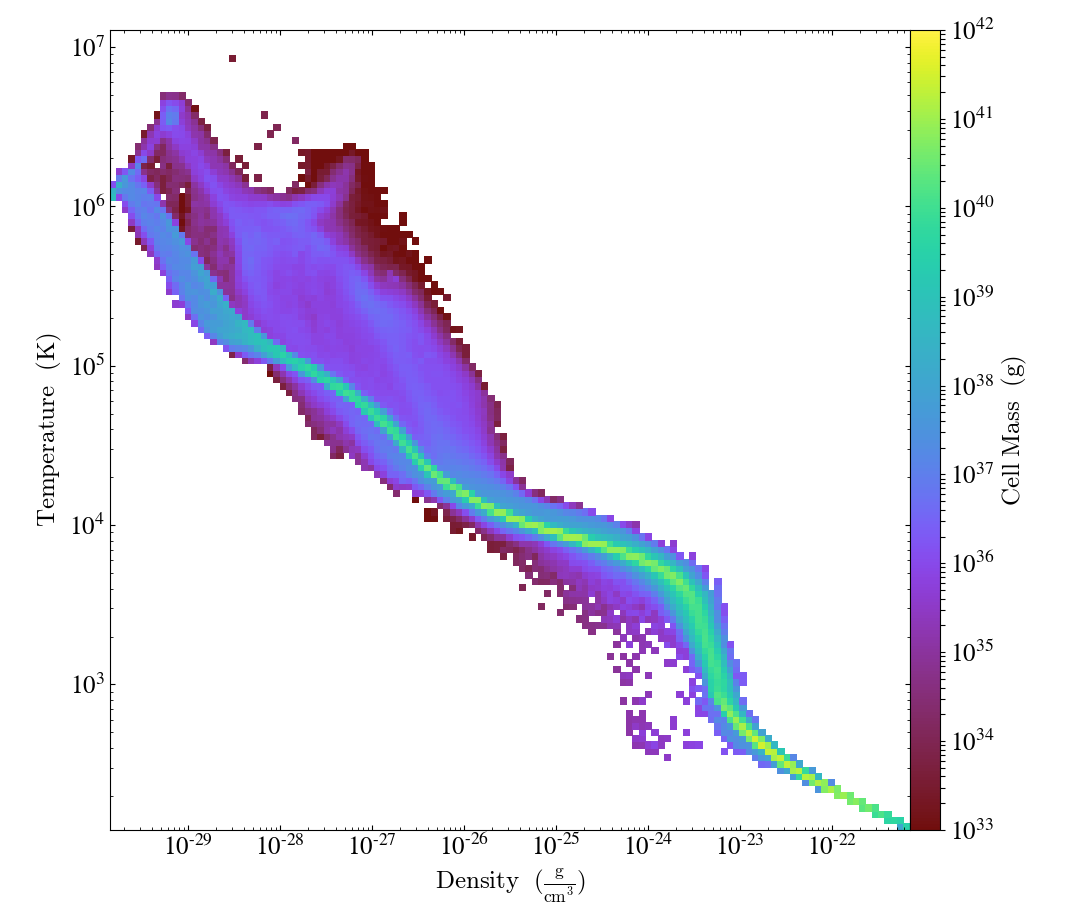

In [11]:
#Ugh!  Why is this not labeling the cell mass range?!  Maybe I can force it...

plot = yt.PhasePlot(disku,"density","temperature",["cell_mass"],weight_field=None)
plot.set_zlim("cell_mass",1e33,1e42)


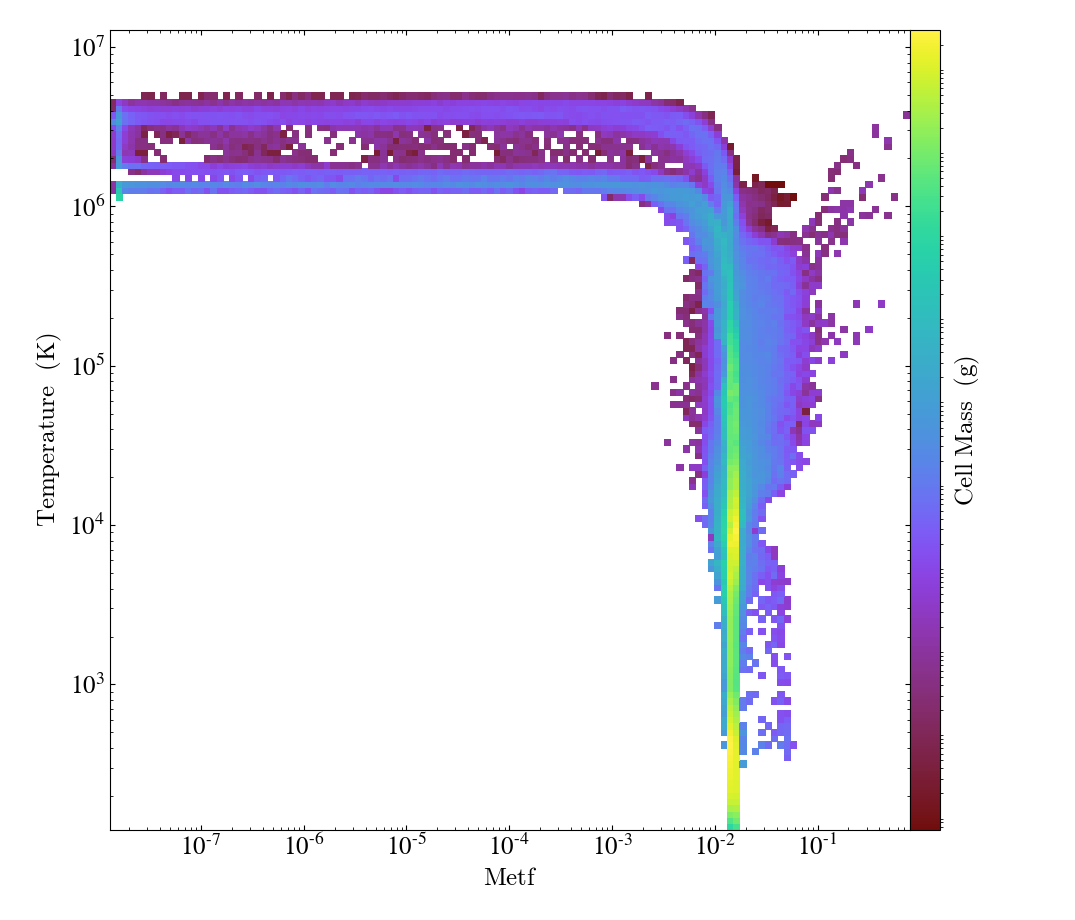

In [12]:
#I think I am including a lot of gas that is not in the disk.  Can I get rid of it?
yt.PhasePlot(disku,"metf","temperature",["cell_mass"],weight_field=None)


In [13]:
#If I wanted I could take a look at a slice to really see what I am removing
#yt.SlicePlot(ds,"z","metf",data_source=disku,center=(0.53,0.53,0.53),width=(70,'kpc'))
#plt.set_zlim("metallicity",0.01,0.011)

In [14]:
#So I can pretty safely get rid of all gas with metf > 2e-3
diskchoose = disku.cut_region(["obj['metf'] > 0.002"])


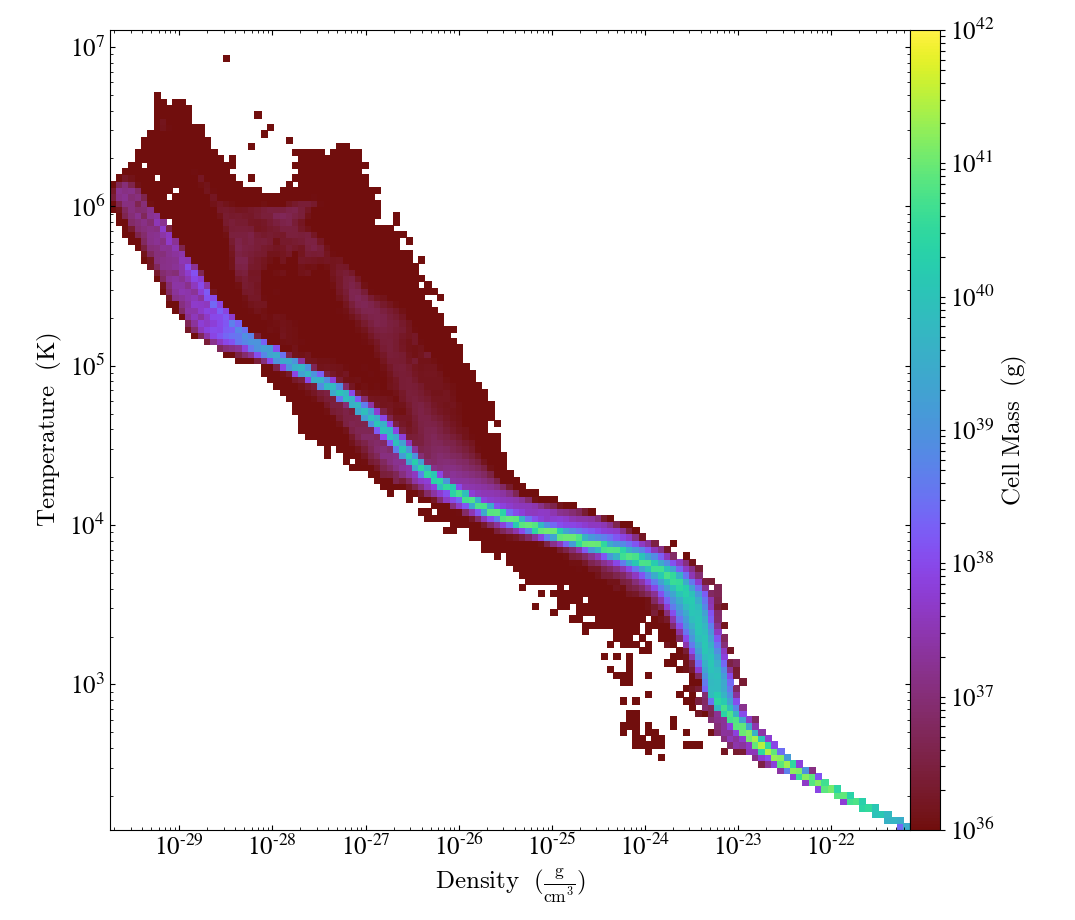

In [15]:
plot = yt.PhasePlot(diskchoose,"density","temperature",["cell_mass"],weight_field=None)
#plot.set_zlim("cell_mass",1e33,1e42)
plot.set_zlim("cell_mass",1e36,1e42)


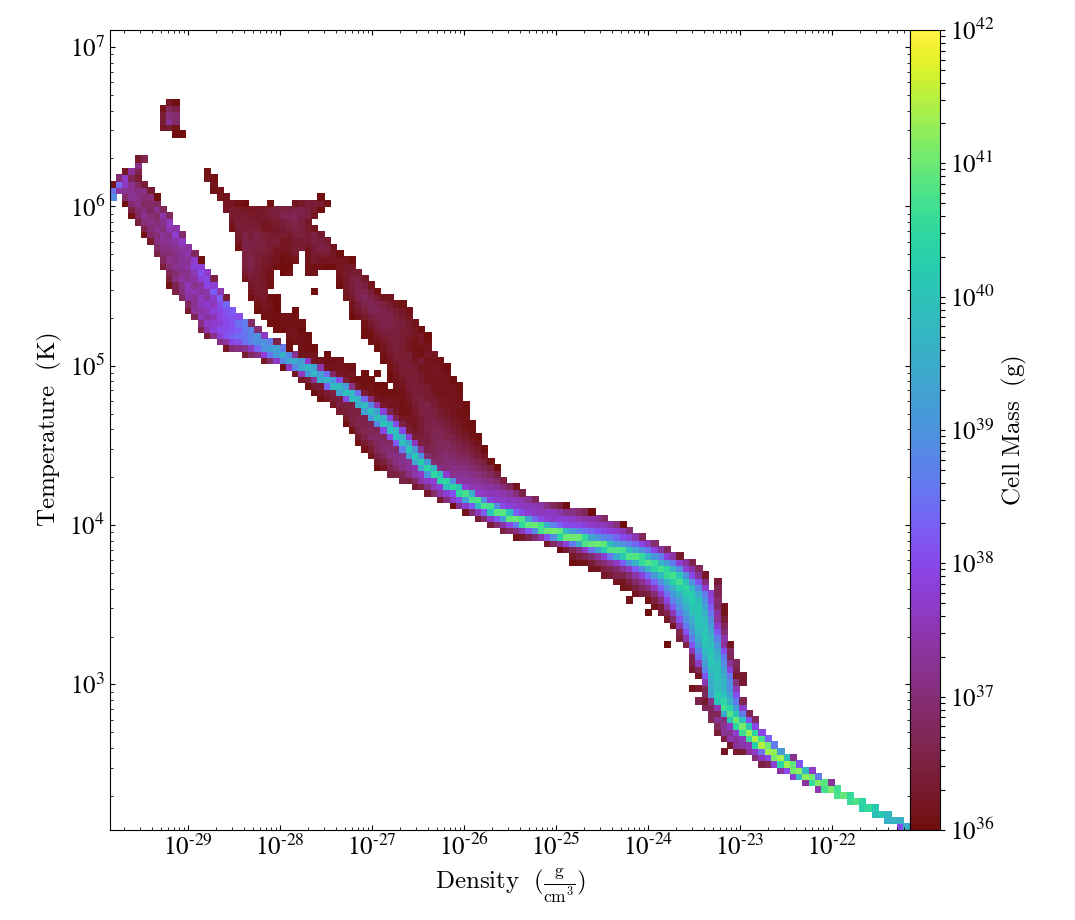

In [16]:
#That did not actually clean up my phaseplot.  To do that I have to use create_profile:
profile = yt.create_profile(disku, ['density','temperature'], 'cell_mass',n_bins=128,weight_field=None)
histogram = profile.field_data['gas','cell_mass']
histogram[histogram < 1e36] = 0 
plot3 = yt.PhasePlot.from_profile(profile)
plot3.set_zlim('cell_mass',1e36,1e42)


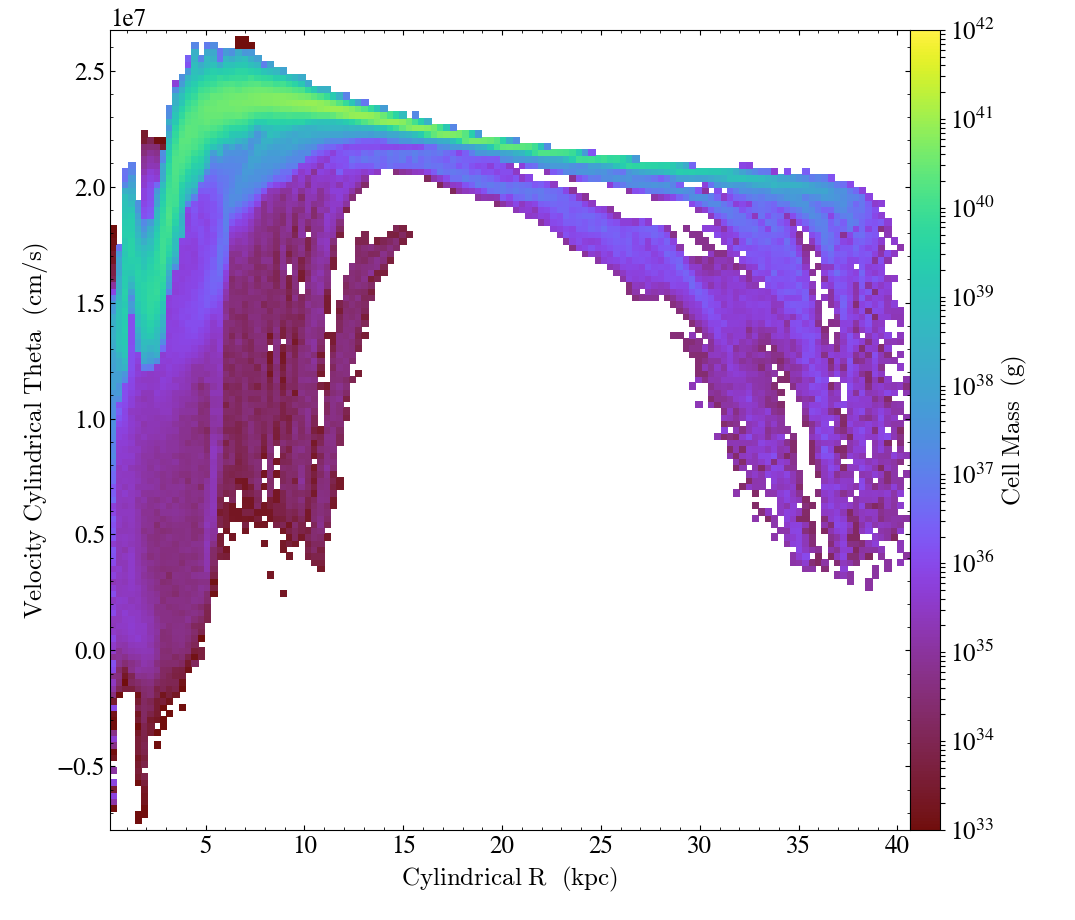

In [17]:
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["cell_mass"],weight_field=None)
plot.set_zlim("cell_mass",1e33,1e42)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)
#plot.set_zlim("cell_mass",1e36,1e42)


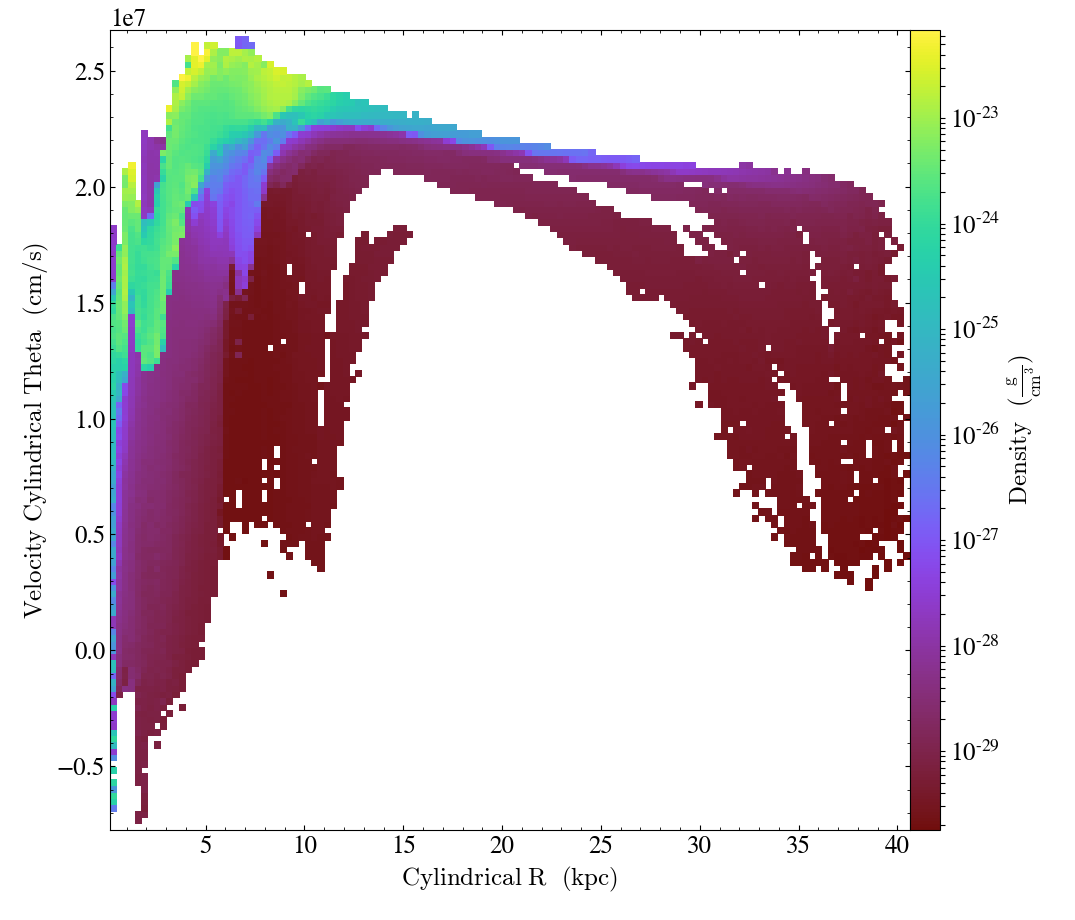

In [18]:
#Let's see why we have such a spread
#Is it that different density gas is moving at different velocities?
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["density"],weight_field="ones")
#plot.set_zlim("cell_mass",1e33,1e42)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)

In [20]:
plot = yt.PhasePlot(diskchoose,"cylindrical_r","velocity_cylindrical_theta",["zdisk"],weight_field="ones")
plot.set_unit("zdisk","kpc")
plot.set_zlim("z",-5,5)
plot.set_unit("cylindrical_r","kpc")
plot.set_log('cylindrical_r',False)
plot.set_log('velocity_cylindrical_theta',False)
plot.set_log('zdisk',False)


KeyError: ('gas', 'z')